<a href="https://colab.research.google.com/github/MELAI-1/master-project/blob/main/AIMS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I-GOOGLE ACCOUNT AUTHENTIFICATION**

In [2]:
from google.colab import auth
auth.authenticate_user()


# **II-IMPORT THE REQUIREMENTS LIBRARIES**

In [2]:
! pip install -q -U zarr xarray gcsfs
import xarray as xr
import gcsfs
import zarr
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

# define the neuralgcm path data
ngcm_path = 'gs://neuralgcm/amip_runs/v1_precip_stochastic_2_8_deg/2001-to-2021_128x64_gauss_37-level_stride3h.zarr'
#load the data
ngcm_data = xr.open_zarr(ngcm_path,chunks={"time":100})

<ipython-input-3-b21b02131e98>:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ngcm_data = xr.open_zarr(ngcm_path,chunks={"time":100})


In [4]:
#the size of the neural gcm data
ngcm_data.nbytes/1e9

1628.740724872

In [7]:
# ngcm_data.chunks

In [5]:
ngcm_data

<xarray.Dataset> Size: 2TB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 58408,
                                          surface: 1, longitude: 128,
                                          latitude: 64, level: 3)
Coordinates:
  * latitude                             (latitude) float64 512B -87.86 ... 8...
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 1kB 0.0 ... 357.2
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 467kB ...
  * surface                              (surface) int64 8B 1
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 71GB dask.array<chunksize=(37, 8, 1, 128, 64), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 71GB dask.array<chunksize=(37, 8, 1, 128, 64), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

In [5]:
#the min and the max values of time in the global neural GCM
print(f"the min date is :",ngcm_data.time.min().values)
print(f"the max date is :",ngcm_data.time.max().values)

the min date is : 2001-01-01T00:00:00.000000000
the max date is : 2001-12-27T00:00:00.000000000


# **neuralGCM data for our domain**

In [8]:
ngcm_data.latitude.values

array([-87.86379884, -85.09652699, -82.31291295, -79.52560657,
       -76.73689968, -73.94751515, -71.15775201, -68.36775611,
       -65.57760701, -62.7873518 , -59.99702011, -57.20663153,
       -54.41619953, -51.62573367, -48.83524097, -46.04472663,
       -43.25419467, -40.46364818, -37.67308963, -34.88252099,
       -32.09194388, -29.30135962, -26.51076933, -23.72017393,
       -20.92957425, -18.13897099, -15.34836476, -12.55775612,
        -9.76714556,  -6.97653355,  -4.18592053,  -1.39530691,
         1.39530691,   4.18592053,   6.97653355,   9.76714556,
        12.55775612,  15.34836476,  18.13897099,  20.92957425,
        23.72017393,  26.51076933,  29.30135962,  32.09194388,
        34.88252099,  37.67308963,  40.46364818,  43.25419467,
        46.04472663,  48.83524097,  51.62573367,  54.41619953,
        57.20663153,  59.99702011,  62.7873518 ,  65.57760701,
        68.36775611,  71.15775201,  73.94751515,  76.73689968,
        79.52560657,  82.31291295,  85.09652699,  87.86

In [9]:
ngcm_data.longitude.values

array([  0.    ,   2.8125,   5.625 ,   8.4375,  11.25  ,  14.0625,
        16.875 ,  19.6875,  22.5   ,  25.3125,  28.125 ,  30.9375,
        33.75  ,  36.5625,  39.375 ,  42.1875,  45.    ,  47.8125,
        50.625 ,  53.4375,  56.25  ,  59.0625,  61.875 ,  64.6875,
        67.5   ,  70.3125,  73.125 ,  75.9375,  78.75  ,  81.5625,
        84.375 ,  87.1875,  90.    ,  92.8125,  95.625 ,  98.4375,
       101.25  , 104.0625, 106.875 , 109.6875, 112.5   , 115.3125,
       118.125 , 120.9375, 123.75  , 126.5625, 129.375 , 132.1875,
       135.    , 137.8125, 140.625 , 143.4375, 146.25  , 149.0625,
       151.875 , 154.6875, 157.5   , 160.3125, 163.125 , 165.9375,
       168.75  , 171.5625, 174.375 , 177.1875, 180.    , 182.8125,
       185.625 , 188.4375, 191.25  , 194.0625, 196.875 , 199.6875,
       202.5   , 205.3125, 208.125 , 210.9375, 213.75  , 216.5625,
       219.375 , 222.1875, 225.    , 227.8125, 230.625 , 233.4375,
       236.25  , 239.0625, 241.875 , 244.6875, 247.5   , 250.3

In [10]:
#select Horn Africa data
ngcm_data_africa = ngcm_data.sel(latitude=slice(-20,30),longitude=slice(15,60))


In [11]:
#the prediction time
ngcm_data_africa.prediction_timedelta.indexes

Indexes:
    prediction_timedelta  TimedeltaIndex([   '0 days 00:00:00',    '0 days 03:00:00',
                   '0 days 06:00:00',    '0 days 09:00:00',
                   '0 days 12:00:00',    '0 days 15:00:00',
                   '0 days 18:00:00',    '0 days 21:00:00',
                   '1 days 00:00:00',    '1 days 03:00:00',
                ...
                '7299 days 18:00:00', '7299 days 21:00:00',
                '7300 days 00:00:00', '7300 days 03:00:00',
                '7300 days 06:00:00', '7300 days 09:00:00',
                '7300 days 12:00:00', '7300 days 15:00:00',
                '7300 days 18:00:00', '7300 days 21:00:00'],
               dtype='timedelta64[ns]', name='prediction_timedelta', length=58408, freq=None)

# we can quicly notice that the slice of the data is the rigth slice

In [12]:
ngcm_data_africa.nbytes/1e9

57.26086748

In [13]:
print(ngcm_data_africa.info())

xarray.Dataset {
dimensions:
	time = 37 ;
	prediction_timedelta = 58408 ;
	surface = 1 ;
	longitude = 16 ;
	latitude = 18 ;
	level = 3 ;

variables:
	float32 evaporation(time, prediction_timedelta, surface, longitude, latitude) ;
	float32 geopotential(time, prediction_timedelta, level, longitude, latitude) ;
	float64 latitude(latitude) ;
	int64 level(level) ;
	float64 longitude(longitude) ;
	float32 precipitation_cumulative_mean(time, prediction_timedelta, surface, longitude, latitude) ;
	timedelta64[ns] prediction_timedelta(prediction_timedelta) ;
	float32 specific_cloud_ice_water_content(time, prediction_timedelta, level, longitude, latitude) ;
	float32 specific_cloud_liquid_water_content(time, prediction_timedelta, level, longitude, latitude) ;
	float32 specific_humidity(time, prediction_timedelta, level, longitude, latitude) ;
	int64 surface(surface) ;
	float32 temperature(time, prediction_timedelta, level, longitude, latitude) ;
	datetime64[ns] time(time) ;
	float32 u_component_of

In [14]:
## find the minimmum time and date present in the Neural GCM data for Horn Africa
ngcm_data_africa.time.min()
# find the maximum time and date present in the Neural GCM data or Horn Africa
# ngcm_data_africa.time.max()

<xarray.DataArray 'time' ()> Size: 8B
array('2001-01-01T00:00:00.000000000', dtype='datetime64[ns]')

In [15]:
ngcm_data_africa.prediction_timedelta
# ou
# selected_data["year"]


<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 58408)> Size: 467kB
array([                 0,     10800000000000,     21600000000000, ...,
       630774000000000000, 630784800000000000, 630795600000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 467kB 00:00:...

In [16]:
#the prediction time for Horn Africa
print(f"the min prediction date is :",ngcm_data_africa.prediction_timedelta.min().values)

print(f"the max prediction date is :",ngcm_data_africa.prediction_timedelta.max().values)


the min prediction date is : 0 nanoseconds
the max prediction date is : 630795600000000000 nanoseconds


In [17]:
ngcm_data_africa.prediction_timedelta.values

array([                 0,     10800000000000,     21600000000000, ...,
       630774000000000000, 630784800000000000, 630795600000000000],
      dtype='timedelta64[ns]')

In [13]:
#select the climate timeset where prediction_timedelta is a multiple of 6h

# Convert prediction_timedelta to a pandas Series for easier manipulation
prediction_timedelta_series = pd.Series(ngcm_data_africa.prediction_timedelta.values)

# Select values where prediction_timedelta is a multiple of 6 hours (in seconds)
selected_indices = prediction_timedelta_series[prediction_timedelta_series % pd.Timedelta(hours=6) == pd.Timedelta(0)].index

# Use the selected indices to filter the entire dataset
selected_data = ngcm_data_africa.isel(prediction_timedelta=selected_indices)

selected_data

<xarray.Dataset> Size: 29GB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(37, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(37, 8, 1, 16, 18), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

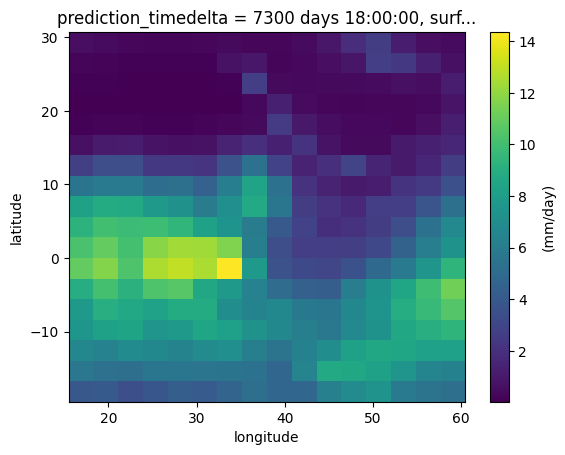

In [19]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-1
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

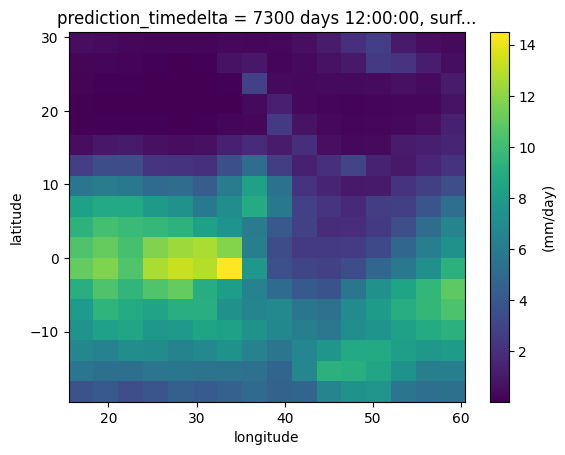

In [20]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-2, surface=0, prediction_timedelta=-2
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

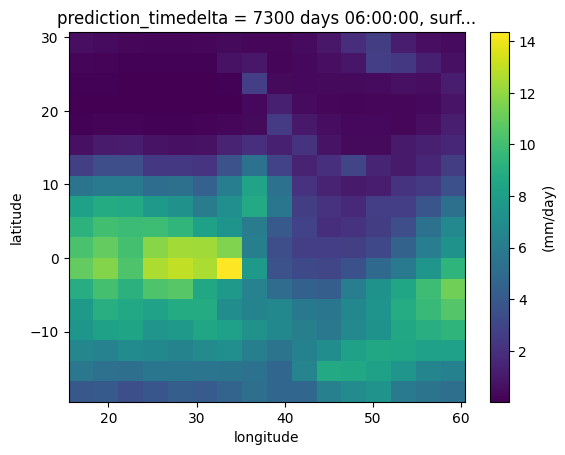

In [21]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-3
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

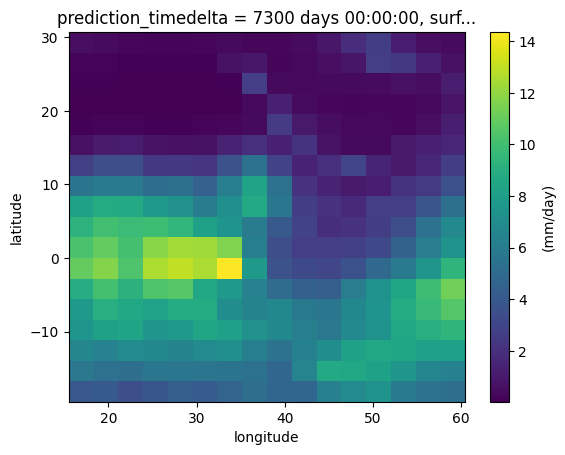

In [22]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-4
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

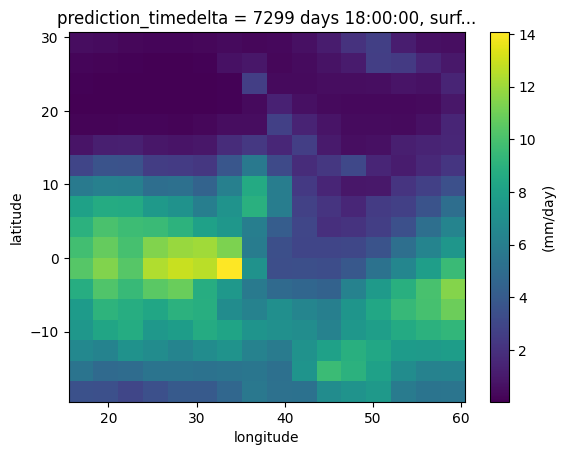

In [23]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-10, surface=0, prediction_timedelta=-5
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

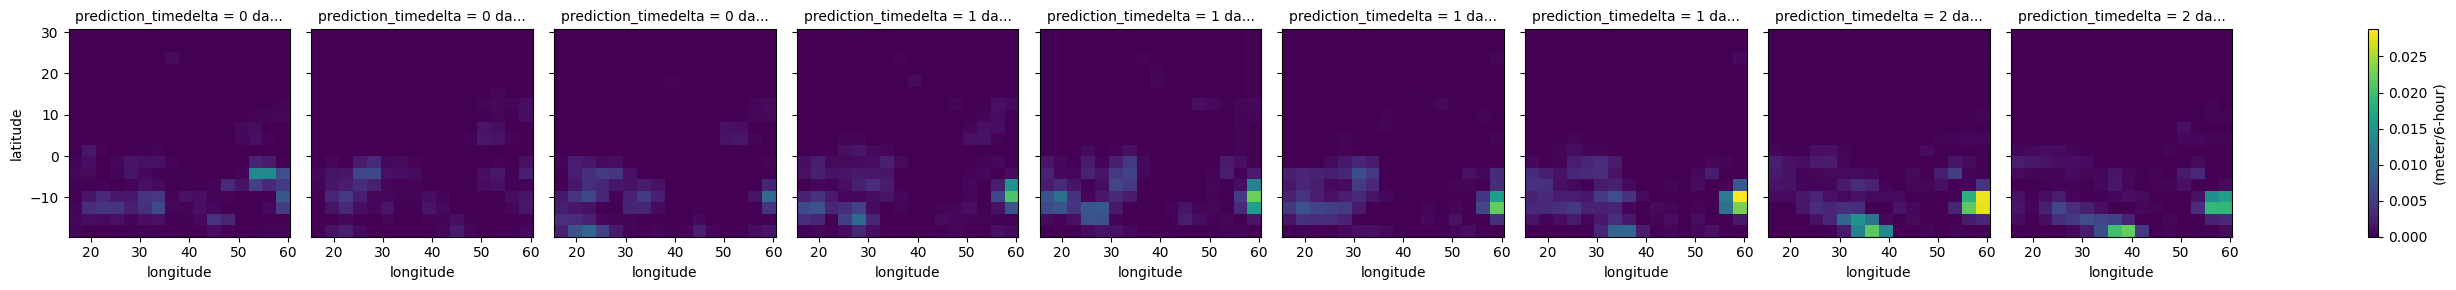

In [24]:
selected_data.precipitation_cumulative_mean.isel(
    time=0, surface=0, prediction_timedelta=slice(0, 10)
).diff('prediction_timedelta').plot(
    x='longitude',
    col='prediction_timedelta',
    cbar_kwargs={'label': '(meter/6-hour)'},
)  # In m per 6 hours

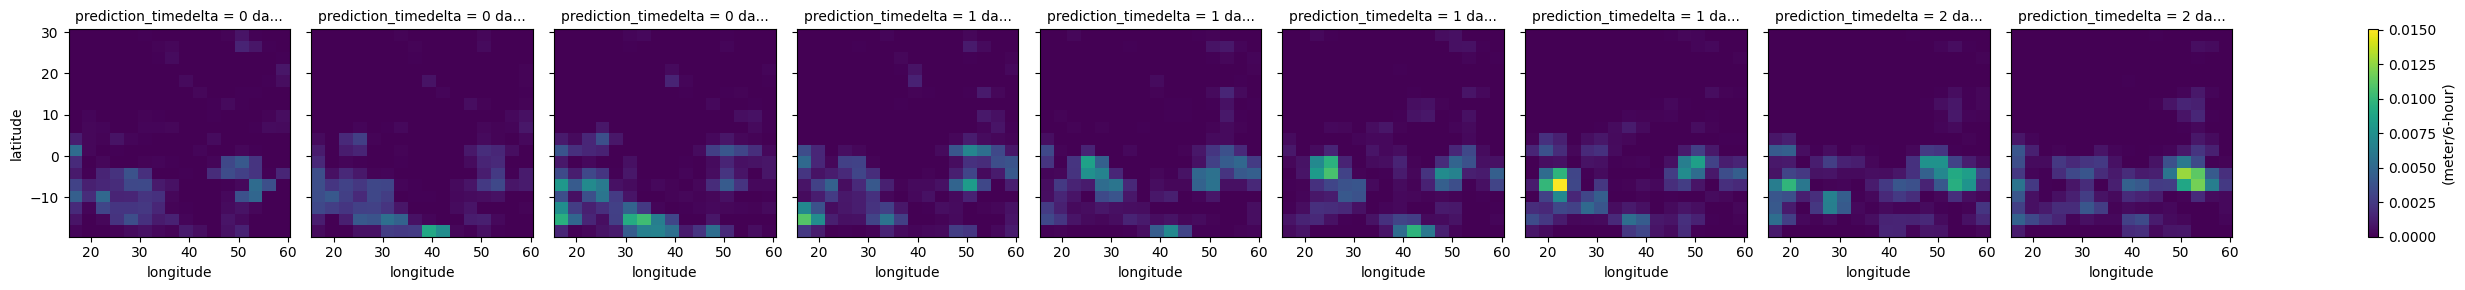

In [25]:
selected_data.precipitation_cumulative_mean.isel(
    time=-2, surface=0, prediction_timedelta=slice(0, 10)
).diff('prediction_timedelta').plot(
    x='longitude',
    col='prediction_timedelta',
    cbar_kwargs={'label': '(meter/6-hour)'},
)  # In m per 6 hours

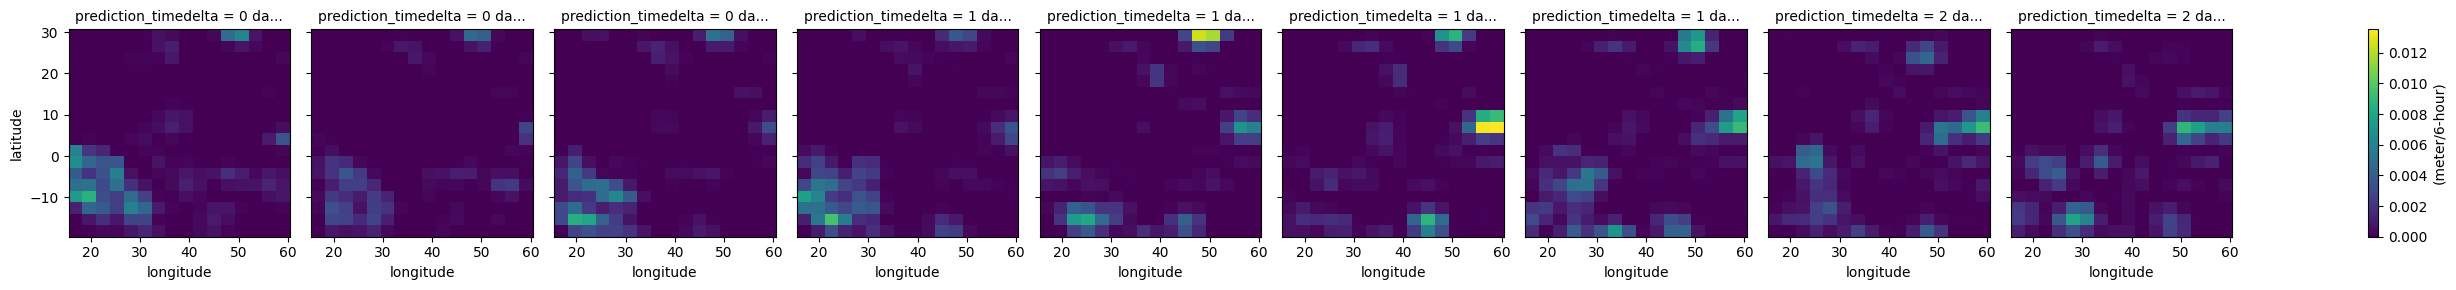

In [26]:
selected_data.precipitation_cumulative_mean.isel(
    time=-3, surface=0, prediction_timedelta=slice(0, 10)
).diff('prediction_timedelta').plot(
    x='longitude',
    col='prediction_timedelta',
    cbar_kwargs={'label': '(meter/6-hour)'},
)  # In m per 6 hours

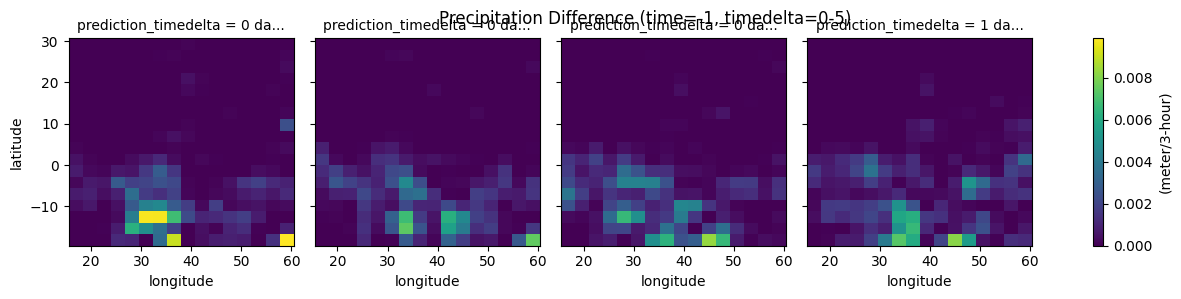

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -1, Prediction timedelta range:0-5
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


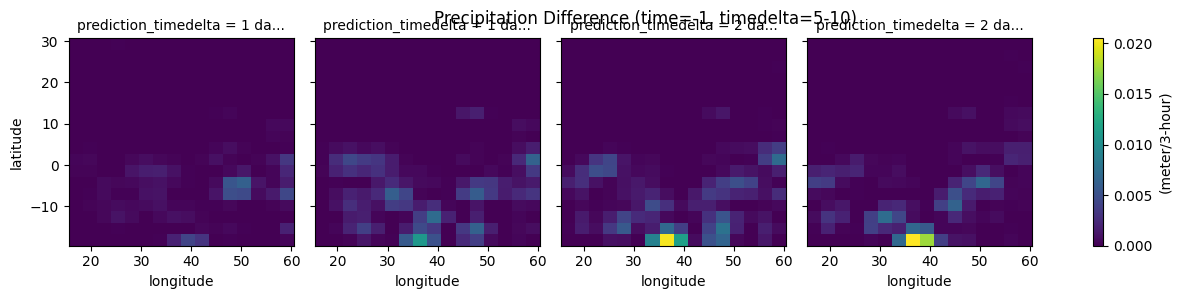

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -1, Prediction timedelta range:5-10
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


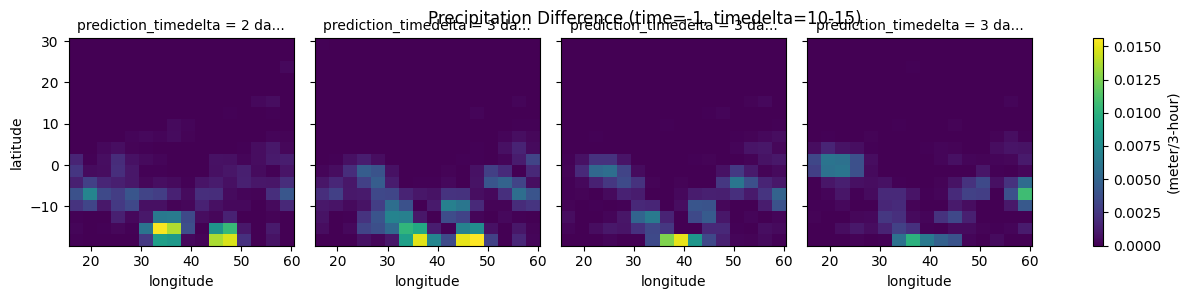

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -1, Prediction timedelta range:10-15
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


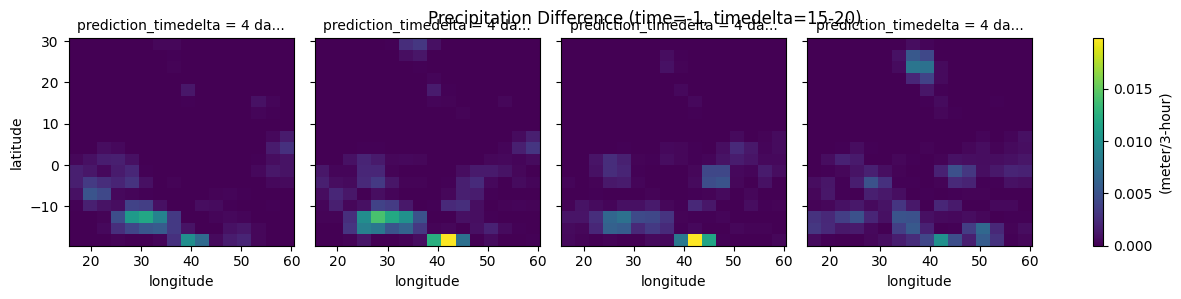

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -1, Prediction timedelta range:15-20
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


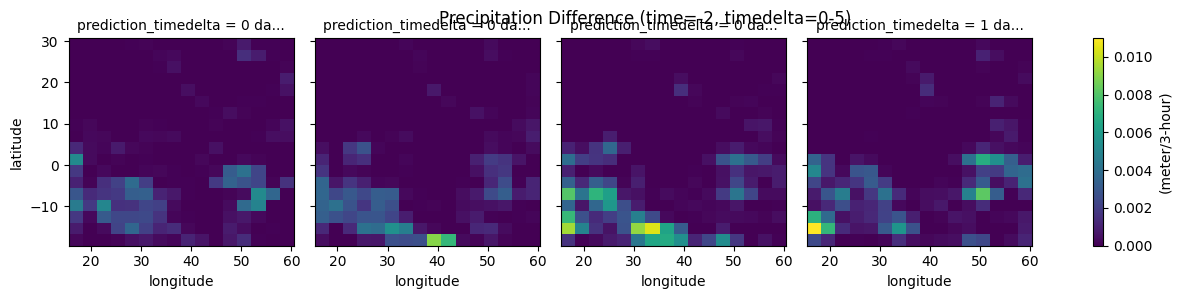

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -2, Prediction timedelta range:0-5
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


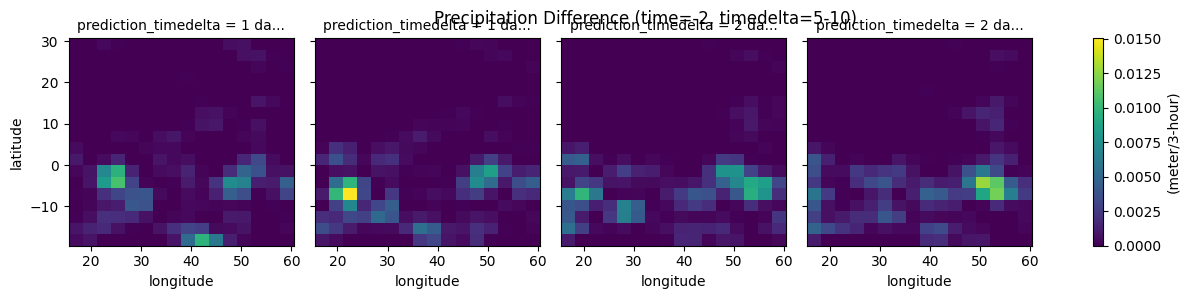

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -2, Prediction timedelta range:5-10
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


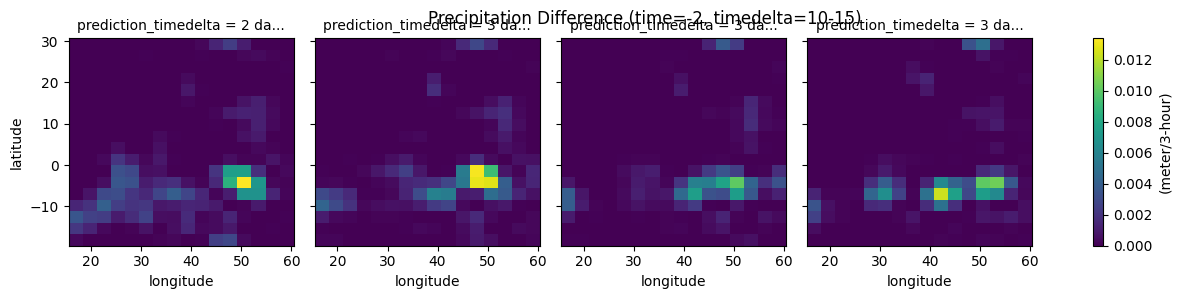

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -2, Prediction timedelta range:10-15
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


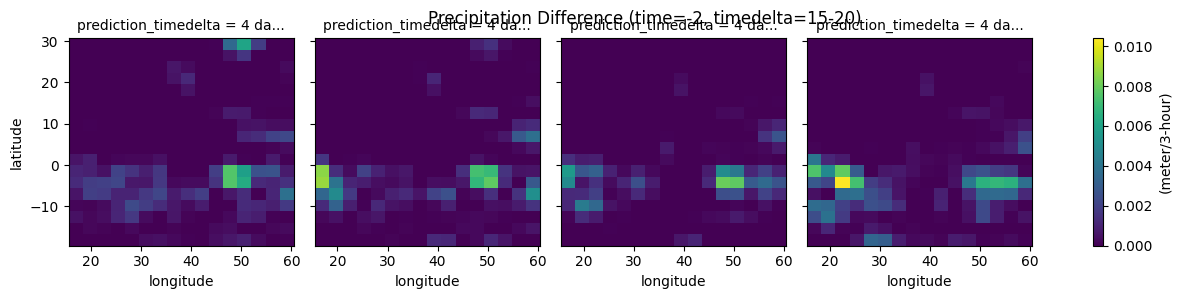

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -2, Prediction timedelta range:15-20
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


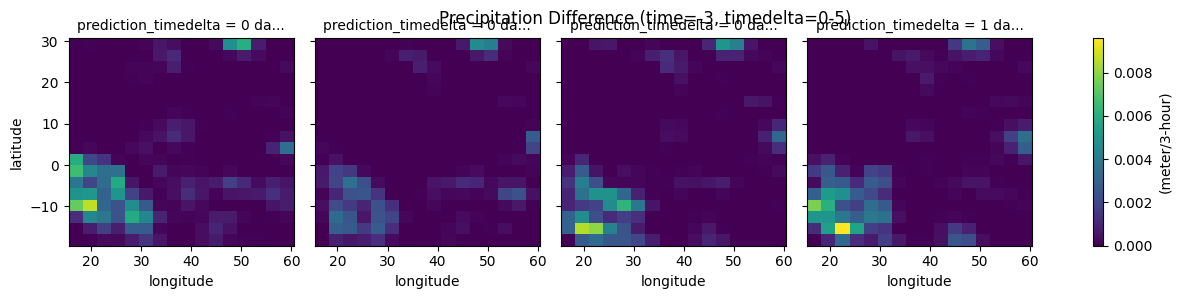

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -3, Prediction timedelta range:0-5
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


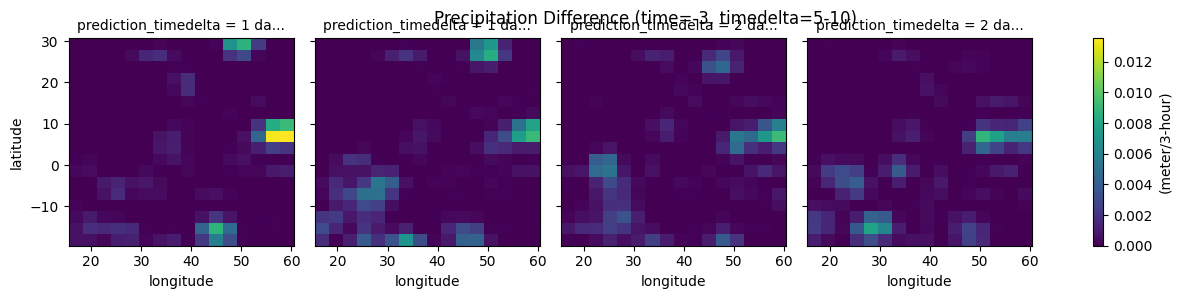

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -3, Prediction timedelta range:5-10
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


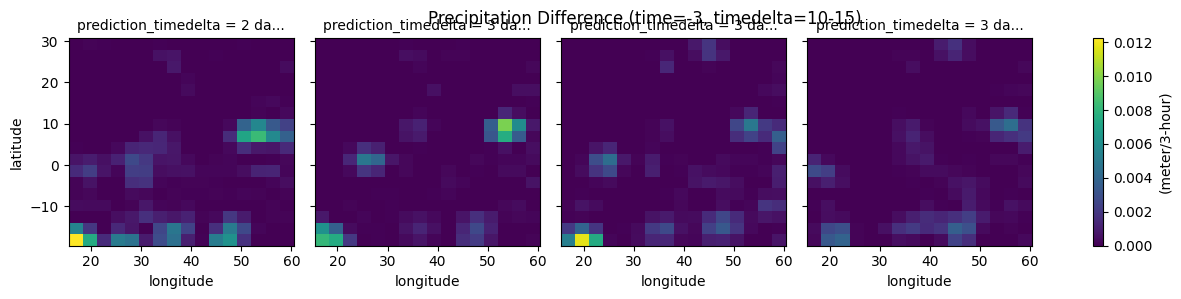

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -3, Prediction timedelta range:10-15
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


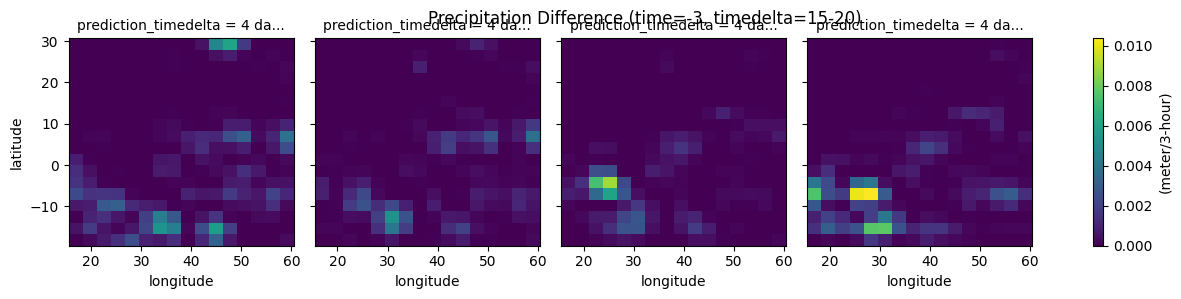

Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.
Time index: -3, Prediction timedelta range:15-20
Observe how the difference varies with longitude and prediction time.
--------------------
--------------------
--------------------


In [27]:
# Iterate through different time steps and prediction timedeltas
for time_index in [-1, -2, -3]:  # Example: Last 3 time steps
    for start_timedelta in range(0, 20, 5): # Example: Start at different timedeltas
        end_timedelta = start_timedelta + 5

        # Extract data and calculate difference
        data_subset = selected_data.precipitation_cumulative_mean.isel(
            time=time_index, surface=0, prediction_timedelta=slice(start_timedelta, end_timedelta)
        ).diff('prediction_timedelta')

        # Plot the data
        data_subset.plot(
            x='longitude',
            col='prediction_timedelta',
            cbar_kwargs={'label': '(meter/3-hour)'},
        )

        # Add title to the plot
        plt.suptitle(f"Precipitation Difference (time={time_index}, timedelta={start_timedelta}-{end_timedelta})")

        plt.show() # important to show the plot

        # Add explanation or analysis here (Example)
        print(f"Plot shows the difference in cumulative mean precipitation between consecutive 6-hour intervals.")
        print(f"Time index: {time_index}, Prediction timedelta range:{start_timedelta}-{end_timedelta}")
        print("Observe how the difference varies with longitude and prediction time.")
        print("-" * 20)
        print("-" * 20)
        print("-" * 20)


In [12]:
!pip install --upgrade "zarr[complete]"
import numcodecs

In [13]:
compressor = numcodecs.Blosc()

In [17]:
africa

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    experiment_id:  121052169
    worker_id:      2

In [28]:
# selected_data.precipitation_cumulative_mean.plot(x="longitude",y='latitude',aspect=2,size=2.5)

# **Times series and correlation**

In [30]:
selected_data.evaporation.prediction_timedelta

<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 29204)> Size: 234kB
array([                 0,     21600000000000,     43200000000000, ...,
       630741600000000000, 630763200000000000, 630784800000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...

In [31]:
selected_data

<xarray.Dataset> Size: 29GB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

In [32]:
ds_annual=selected_data.resample(time='1Y').mean(dim='time',skipna=True)

/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [33]:
print(ds_annual)

<xarray.Dataset> Size: 774MB
Dimensions:                              (time: 1, prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * time                                 (time) datetime64[ns] 8B 2001-12-31
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 34MB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitud

In [34]:
ds_annual.evaporation

<xarray.DataArray 'evaporation' (time: 1, prediction_timedelta: 29204,
                                 surface: 1, longitude: 16, latitude: 18)> Size: 34MB
dask.array<broadcast_to, shape=(1, 29204, 1, 16, 18), dtype=float32, chunksize=(1, 8, 1, 16, 18), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 144B -18.14 -15.35 ... 26.51 29.3
  * longitude             (longitude) float64 128B 16.88 19.69 ... 56.25 59.06
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...
  * surface               (surface) int64 8B 1
  * time                  (time) datetime64[ns] 8B 2001-12-31

In [38]:
annual_temperature=ds_annual.temperature


In [41]:
len(annual_temperature['prediction_timedelta'])

29204

In [44]:
annual_temperature.prediction_timedelta.values

array([                 0,     21600000000000,     43200000000000, ...,
       630741600000000000, 630763200000000000, 630784800000000000],
      dtype='timedelta64[ns]')

In [ ]:
# prompt: je veux plot les differentes temperature moyenne calcule   comme une serie cronologique

import matplotlib.pyplot as plt

# Assuming 'annual_temperature' is already defined as in your provided code
# and contains the yearly averaged temperatures

plt.figure(figsize=(12, 6))

# Assuming 'prediction_timedelta' is the x-axis (time)
plt.plot(annual_temperature.prediction_timedelta.values, annual_temperature.values.mean(dim=('latitude', 'longitude')))  # Plot mean across lat and lon

plt.xlabel("Prediction Timedelta")
plt.ylabel("Mean Annual Temperature")
plt.title("Time Series of Mean Annual Temperature")
plt.grid(True)
plt.show()


In [ ]:
selected_data = selected_data.assign_coords(
    time=start_time + selected_data.prediction_timedelta
)


In [ ]:
selected_data

<xarray.Dataset> Size: 29GB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
    time                                 (prediction_timedelta) datetime64[ns] 234kB ...
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

In [ ]:
selected_data.evaporation

<xarray.DataArray 'evaporation' (time: 37, prediction_timedelta: 29204,
                                 surface: 1, longitude: 16, latitude: 18)> Size: 1GB
dask.array<getitem, shape=(37, 29204, 1, 16, 18), dtype=float32, chunksize=(1, 8, 1, 16, 18), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 144B -18.14 -15.35 ... 26.51 29.3
  * longitude             (longitude) float64 128B 16.88 19.69 ... 56.25 59.06
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...
  * surface               (surface) int64 8B 1
    time                  (prediction_timedelta) datetime64[ns] 234kB 2001-01...

In [ ]:
selected_data.precipitation_cumulative_mean

<xarray.DataArray 'precipitation_cumulative_mean' (time: 37,
                                                   prediction_timedelta: 29204,
                                                   surface: 1, longitude: 16,
                                                   latitude: 18)> Size: 1GB
dask.array<getitem, shape=(37, 29204, 1, 16, 18), dtype=float32, chunksize=(1, 8, 1, 16, 18), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 144B -18.14 -15.35 ... 26.51 29.3
  * longitude             (longitude) float64 128B 16.88 19.69 ... 56.25 59.06
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...
  * surface               (surface) int64 8B 1
    time                  (prediction_timedelta) datetime64[ns] 234kB 2001-01...

In [ ]:
selected_data.precipitation_cumulative_mean.isel(
    time='2020-01-01T00', surface=0, prediction_timedelta=slice(0, 5)
).diff('prediction_timedelta').plot(
    x='longitude',
    col='prediction_timedelta',
    cbar_kwargs={'label': '(meter/3-hour)'},
)  # In m per 3 hours

KeyError: 'time'

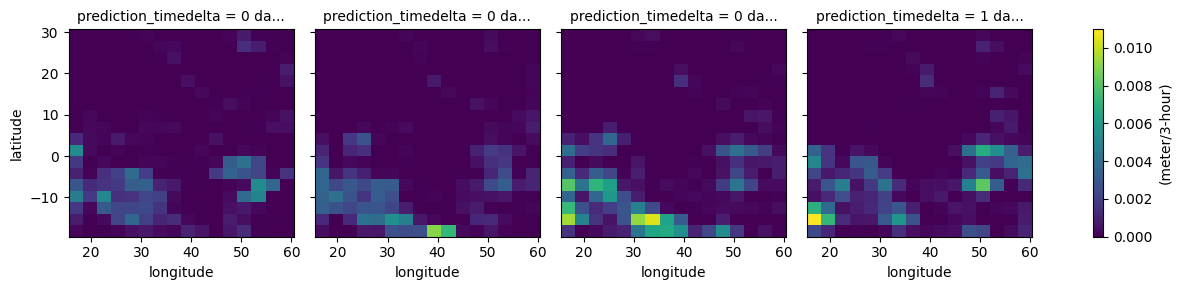

In [ ]:
# prompt: selected_data.precipitation_cumulative_mean.isel(
#     time=-2, surface=0, prediction_timedelta=slice(0, 5)
# ).diff('prediction_timedelta').plot(
#     x='longitude',
#     col='prediction_timedelta',
#     cbar_kwargs={'label': '(meter/3-hour)'},
# )  # In m per 3 hours i want to plot the timeseries vor the precipitation_cumulative_mean

selected_data.precipitation_cumulative_mean.isel(
    time=-2, surface=0, prediction_timedelta=slice(0, 5)
).diff('prediction_timedelta').plot(
    x='longitude',
    col='prediction_timedelta',
    cbar_kwargs={'label': '(meter/3-hour)'},
)


In [ ]:

selected_data.evaporation

<xarray.DataArray 'evaporation' (time: 37, prediction_timedelta: 29204,
                                 surface: 1, longitude: 16, latitude: 18)> Size: 1GB
dask.array<getitem, shape=(37, 29204, 1, 16, 18), dtype=float32, chunksize=(1, 8, 1, 16, 18), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 144B -18.14 -15.35 ... 26.51 29.3
  * longitude             (longitude) float64 128B 16.88 19.69 ... 56.25 59.06
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...
  * surface               (surface) int64 8B 1
    time                  (prediction_timedelta) datetime64[ns] 234kB 2001-01...

In [ ]:
selected_data.time.indexes

Indexes:
    prediction_timedelta  TimedeltaIndex([   '0 days 00:00:00',    '0 days 06:00:00',
                   '0 days 12:00:00',    '0 days 18:00:00',
                   '1 days 00:00:00',    '1 days 06:00:00',
                   '1 days 12:00:00',    '1 days 18:00:00',
                   '2 days 00:00:00',    '2 days 06:00:00',
                ...
                '7298 days 12:00:00', '7298 days 18:00:00',
                '7299 days 00:00:00', '7299 days 06:00:00',
                '7299 days 12:00:00', '7299 days 18:00:00',
                '7300 days 00:00:00', '7300 days 06:00:00',
                '7300 days 12:00:00', '7300 days 18:00:00'],
               dtype='timedelta64[ns]', name='prediction_timedelta', length=29204, freq=None)

In [ ]:
annual_mean = selected_data.evaporation.groupby("time.year").mean("time")


In [ ]:
annual_mean

<xarray.DataArray 'evaporation' (prediction_timedelta: 29204, surface: 1,
                                 longitude: 16, latitude: 18)> Size: 34MB
dask.array<getitem, shape=(29204, 1, 16, 18), dtype=float32, chunksize=(8, 1, 16, 18), chunktype=numpy.ndarray>
Coordinates:
  * latitude              (latitude) float64 144B -18.14 -15.35 ... 26.51 29.3
  * longitude             (longitude) float64 128B 16.88 19.69 ... 56.25 59.06
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...
  * surface               (surface) int64 8B 1
    time                  (prediction_timedelta) datetime64[ns] 234kB 2001-01...

In [ ]:
import matplotlib.pyplot as plt

annual_mean.plot(marker="o")
plt.title("Moyenne annuelle d'évaporation")
plt.xlabel("Année")
plt.ylabel("Évaporation moyenne")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'selected_data' and 'ngcm_data_africa' are defined from the previous code

# Function to calculate and plot time series at different frequencies
def plot_time_series(data, freq_str, freq_val, title):
    # Resample the data to the given frequency
    daily_mean = data.resample(time=freq_str).mean()

    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(daily_mean.time, daily_mean)
    plt.xlabel('Time')
    plt.ylabel('Mean Value')
    plt.title(title)
    plt.grid(True)
    plt.show()


In [ ]:
# Approximation : 365 jours * 24 heures = 8760
annual_data = selected_data.evaporation.coarsen(time=8760, boundary="trim").mean()


In [ ]:

# Approximation : 365 jours * 24 heures = 8760
# Calculate and plot daily means
daily_data = selected_data.evaporation.coarsen(prediction_timedelta=16, boundary="trim").mean() # this is wrong!
plot_time_series(daily_data, 'D', 1, 'Daily Mean Evaporation')

NameError: name 'selected_data' is not defined

In [ ]:
# prompt: je veux que tu fasses la moyenne de touts les valeurs en pas de 4 de ce dataset car cela representera la moyenne journaliere ensuite que tu fasses le plot du times series ensuite tu fais la meme chose pour la semaine ,ensuite pour le mois ensuite pour l'annee sachant que la moyenne de 4 valeurs est la moyenne journaliere


# Calculate and plot weekly means
weekly_data = daily_data.resample(time='W').mean()
plot_time_series(weekly_data, 'W', 7, 'Weekly Mean Evaporation')

# Calculate and plot monthly means
monthly_data = daily_data.resample(time='M').mean()
plot_time_series(monthly_data, 'M', 30, 'Monthly Mean Evaporation')


# Calculate and plot yearly means
yearly_data = daily_data.resample(time='Y').mean()
plot_time_series(yearly_data, 'Y', 365, 'Yearly Mean Evaporation')


In [ ]:
# prompt: j'ai maintenant envie parlant du dataset selected_data produire les timeseries de chaque variables presente dans ce dataset en commencent par heure ,ensuite par jour ,ensuite par semaine,puis par mois ensuite par annee

import matplotlib.pyplot as plt

selected_data.evaporation.resample(time='Y').mean().plot(label='Yearly')
plt.title('evaporation (Yearly)')
plt.show()


/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:490: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [ ]:


# Supposons que vous avez déjà votre DataArray `ngcm_data_africa.evaporation.prediction_timedelta`

# Exemple de création d'un DataArray similaire
timedelta_data = pd.to_timedelta([
    '0 days 06:00:00', '0 days 09:00:00', '0 days 12:00:00',
    '0 days 15:00:00', '0 days 18:00:00', '0 days 21:00:00',
    '1 days 00:00:00', '1 days 03:00:00',
    '7299 days 18:00:00', '7299 days 21:00:00',
    '7300 days 00:00:00', '7300 days 03:00:00',
    '7300 days 06:00:00', '7300 days 09:00:00',
    '7300 days 12:00:00', '7300 days 15:00:00',
    '7300 days 18:00:00', '7300 days 21:00:00'
])
# Créez un DataArray
da = xr.DataArray(timedelta_data, dims='prediction_time', coords={'prediction_time': timedelta_data})

# Convertir en DataFrame
df = pd.DataFrame({'prediction_timedelta': da.values})

# Convertir le Timedelta en jours
df['days'] = df['prediction_timedelta'].dt.total_seconds() / (24 * 3600)

# Calculer les statistiques par jour
daily_stats = df.groupby(df['prediction_timedelta'].dt.days).agg(
    min=('days', 'min'),
    max=('days', 'max'),
    mean=('days', 'mean'),
    std=('days', 'std')
).reset_index()

# Affichage des résultats
print(daily_stats)

   prediction_timedelta      min       max       mean       std
0                     0     0.25     0.875     0.5625  0.233854
1                     1     1.00     1.125     1.0625  0.088388
2                  7299  7299.75  7299.875  7299.8125  0.088388
3                  7300  7300.00  7300.875  7300.4375  0.306186


In [ ]:
ngcm_data_africa.evaporation.prediction_timedelta.values

array([                 0,     10800000000000,     21600000000000, ...,
       630774000000000000, 630784800000000000, 630795600000000000],
      dtype='timedelta64[ns]')

In [ ]:
# prompt: i just want to select the values like 00h , 06h, 12h,18h,24h

# Convert the prediction_timedelta values to strings
timedeltas = ngcm_data_africa.evaporation.prediction_timedelta.dt.total_seconds()
# # Use a list comprehension to select only the desired timedeltas
# selected_timedeltas = [td for td in timedeltas if td.endswith(('00h', '06h', '12h', '18h'))]
timedeltas
# # Print the selected timedeltas
# selected_timedeltas


<xarray.DataArray 'total_seconds' (prediction_timedelta: 58408)> Size: 467kB
array([0.000000e+00, 1.080000e+04, 2.160000e+04, ..., 6.307740e+08,
       6.307848e+08, 6.307956e+08])
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 467kB 00:00:...

In [ ]:
seconds = ngcm_data_africa.evaporation.prediction_timedelta.dt.total_seconds()
mask = (seconds % (6*3600)) == 0
ngcm_data_6h = ngcm_data_africa.where(mask, drop=True)

In [ ]:
ngcm_data_6h

<xarray.Dataset> Size: 29GB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(1, 8, 3, 16, 18), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Vous avez déjà filtré les données aux intervalles de 6h:
# seconds = ngcm_data_africa.evaporation.prediction_timedelta.dt.total_seconds()
# mask = (seconds % (6*3600)) == 0
# ngcm_data_6h = ngcm_data_africa.where(mask, drop=True)

# 1. Convertir les timedeltas en datetime en ajoutant à une date de référence
reference_date = pd.Timestamp('2000-01-01')  # Ajustez selon votre cas réel
ngcm_data_6h['datetime'] = reference_date + ngcm_data_6h.prediction_timedelta

# 2. Extraire la date (sans l'heure) pour le regroupement journalier
ngcm_data_6h['date'] = ngcm_data_6h.datetime.dt.floor('D')

# 3. Calculer la somme journalière
daily_sum = ngcm_data_6h.evaporation.groupby(ngcm_data_6h.date).sum()

# 4. Ajouter les coordonnées pour l'année et le jour de l'année
daily_sum = daily_sum.assign_coords(
    year=('date', daily_sum.date.dt.year),
    dayofyear=('date', daily_sum.date.dt.dayofyear)
)

# 5. Créer un graphique de série temporelle pour chaque année
years = np.unique(daily_sum.year.values)

plt.figure(figsize=(14, 8))
for year in years:
    # Sélectionner les données de l'année
    year_data = daily_sum.sel(year=year)
    # Tracer la série temporelle pour cette année
    plt.plot(year_data.dayofyear, year_data.values, label=f'Année {year}')

plt.title('Évaporation journalière par année')
plt.xlabel('Jour de l\'année')
plt.ylabel('Somme d\'évaporation journalière')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pour visualiser la tendance générale sur les 20 ans:
annual_mean = daily_sum.groupby('year').mean()

plt.figure(figsize=(12, 6))
plt.plot(annual_mean.year.values, annual_mean.values, marker='o')
plt.title('Moyenne annuelle d\'évaporation sur 20 ans')
plt.xlabel('Année')
plt.ylabel('Évaporation moyenne journalière')
plt.grid(True)
plt.show()

TypeError: Variable 'year': Using a DataArray object to construct a variable is ambiguous, please extract the data using the .data property.

In [ ]:
# Pour faire la moyenne spatiale avant la sommation journalière
# Si vous avez des dimensions comme latitude et longitude
spatial_mean = ngcm_data_6h.evaporation.mean(dim=['latitude', 'longitude'])
daily_sum_spatial = spatial_mean.groupby(ngcm_data_6h.date).sum()

# Ou pour une région spécifique:
# region_data = ngcm_data_6h.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
# region_mean = region_data.evaporation.mean(dim=['latitude', 'longitude'])
# daily_sum_region = region_mean.groupby(ngcm_data_6h.date).sum()

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Liste des variables à analyser (évaporation + 7 autres)
variables = ['evaporation', 'variable2', 'variable3', 'variable4',
             'variable5', 'variable6', 'variable7', 'variable8']
# Remplacez les noms des variables par vos variables réelles

# Fonction pour traiter chaque variable
def process_variable(data, var_name, reference_date):
    # Filtrer les données par intervalles de 6h si ce n'est pas déjà fait
    seconds = data[var_name].prediction_timedelta.dt.total_seconds()
    mask = (seconds % (6*3600)) == 0
    data_6h = data.where(mask, drop=True)

    # Convertir les timedeltas en datetime
    data_6h['datetime'] = reference_date + data_6h.prediction_timedelta
    data_6h['date'] = data_6h.datetime.dt.floor('D')

    # Calculer les statistiques journalières
    daily_mean = data_6h[var_name].groupby(data_6h.date).mean()
    daily_min = data_6h[var_name].groupby(data_6h.date).min()
    daily_max = data_6h[var_name].groupby(data_6h.date).max()
    daily_std = data_6h[var_name].groupby(data_6h.date).std()

    # Ajouter coordonnées année et jour de l'année
    daily_mean = daily_mean.assign_coords(
        year=('date', daily_mean.date.dt.year),
        dayofyear=('date', daily_mean.date.dt.dayofyear)
    )
    daily_min = daily_min.assign_coords(year=daily_mean.year, dayofyear=daily_mean.dayofyear)
    daily_max = daily_max.assign_coords(year=daily_mean.year, dayofyear=daily_mean.dayofyear)
    daily_std = daily_std.assign_coords(year=daily_mean.year, dayofyear=daily_mean.dayofyear)

    return daily_mean, daily_min, daily_max, daily_std

# Traiter toutes les variables
reference_date = pd.Timestamp('2000-01-01')  # Ajustez selon votre cas
results = {}

for var in variables:
    results[var] = process_variable(ngcm_data_africa, var, reference_date)

# Créer un graphique pour chaque variable avec moyenne, min, max et écart-type
# Organiser en 4x2 sous-graphiques (pour 8 variables)
fig = plt.figure(figsize=(20, 24))
gs = GridSpec(4, 2, figure=fig)

for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    ax = fig.add_subplot(gs[row, col])

    daily_mean, daily_min, daily_max, daily_std = results[var]

    # Calculer les moyennes annuelles
    annual_mean = daily_mean.groupby('year').mean()
    annual_min = daily_min.groupby('year').mean()
    annual_max = daily_max.groupby('year').mean()
    annual_std = daily_std.groupby('year').mean()

    years = annual_mean.year.values

    # Tracer sur le même graphique
    ax.plot(years, annual_mean.values, 'o-', color='blue', label='Moyenne')
    ax.plot(years, annual_min.values, 'o-', color='green', label='Min')
    ax.plot(years, annual_max.values, 'o-', color='red', label='Max')
    ax.plot(years, annual_std.values, 'o-', color='purple', label='Écart-type')

    ax.set_title(f'Statistiques annuelles - {var}')
    ax.set_xlabel('Année')
    ax.set_ylabel('Valeur')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# Pour une visualisation alternative - évolution saisonnière
# Créer un second ensemble de graphiques montrant l'évolution par jour de l'année
fig2 = plt.figure(figsize=(20, 24))
gs2 = GridSpec(4, 2, figure=fig2)

for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    ax = fig2.add_subplot(gs2[row, col])

    daily_mean, daily_min, daily_max, daily_std = results[var]

    # Moyenner sur toutes les années pour chaque jour de l'année
    seasonal_mean = daily_mean.groupby('dayofyear').mean()
    seasonal_min = daily_min.groupby('dayofyear').min()
    seasonal_max = daily_max.groupby('dayofyear').max()
    seasonal_std = daily_std.groupby('dayofyear').mean()

    days = seasonal_mean.dayofyear.values

    # Tracer sur le même graphique
    ax.plot(days, seasonal_mean.values, '-', color='blue', label='Moyenne')
    ax.fill_between(days, seasonal_min.values, seasonal_max.values,
                   color='lightblue', alpha=0.3, label='Min-Max Range')
    ax.plot(days, seasonal_mean.values + seasonal_std.values, '--',
           color='purple', alpha=0.7, label='Moyenne + Écart-type')
    ax.plot(days, seasonal_mean.values - seasonal_std.values, '--',
           color='purple', alpha=0.7, label='Moyenne - Écart-type')

    ax.set_title(f'Cycle saisonnier - {var}')
    ax.set_xlabel('Jour de l\'année')
    ax.set_ylabel('Valeur')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre liste de variables contient précipitations
variables = ['precipitation', 'evaporation', 'variable3', 'variable4',
             'variable5', 'variable6', 'variable7', 'variable8']
# Assurez-vous que 'precipitation' est le nom exact de la variable dans votre dataset

# Fonction pour prétraiter les données (filtrage 6h et agrégation journalière)
def preprocess_for_correlation(data, var_name, reference_date):
    # Filtrer les données par intervalles de 6h
    seconds = data[var_name].prediction_timedelta.dt.total_seconds()
    mask = (seconds % (6*3600)) == 0
    data_6h = data.where(mask, drop=True)

    # Convertir les timedeltas en datetime
    data_6h['datetime'] = reference_date + data_6h.prediction_timedelta
    data_6h['date'] = data_6h.datetime.dt.floor('D')

    # Calculer les moyennes journalières
    daily_mean = data_6h[var_name].groupby(data_6h.date).mean()

    return daily_mean

# Prétraiter toutes les variables
reference_date = pd.Timestamp('2000-01-01')  # Ajustez selon votre cas
daily_data = {}

for var in variables:
    daily_data[var] = preprocess_for_correlation(ngcm_data_africa, var, reference_date)

# Créer un DataFrame pandas avec toutes les variables pour faciliter le calcul de corrélation
df_corr = pd.DataFrame(index=daily_data['precipitation'].date.values)

for var in variables:
    # Assurez-vous que les indices correspondent
    temp_series = daily_data[var].to_series()
    df_corr[var] = temp_series.reindex(df_corr.index)

# Calculer la matrice de corrélation
correlation_matrix = df_corr.corr()

# Afficher les corrélations avec la variable précipitations
precip_correlations = correlation_matrix['precipitation'].drop('precipitation')
print("Corrélations avec les précipitations:")
print(precip_correlations)

# Visualiser les corrélations
plt.figure(figsize=(12, 6))
precip_correlations.sort_values().plot(kind='bar')
plt.title('Corrélation des variables avec les précipitations')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualiser la matrice de corrélation complète avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Matrice de corrélation entre toutes les variables')
plt.tight_layout()
plt.show()

In [ ]:
# Ajouter une colonne pour les saisons
df_corr['season'] = pd.cut(pd.DatetimeIndex(df_corr.index).dayofyear,
                          bins=[0, 90, 181, 273, 366],
                          labels=['Hiver', 'Printemps', 'Été', 'Automne'])

# Calculer les corrélations par saison
seasonal_correlations = {}
for season in ['Hiver', 'Printemps', 'Été', 'Automne']:
    season_df = df_corr[df_corr['season'] == season].drop(columns=['season'])
    seasonal_correlations[season] = season_df.corr()['precipitation'].drop('precipitation')

# Visualiser les corrélations saisonnières
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, season in enumerate(['Hiver', 'Printemps', 'Été', 'Automne']):
    seasonal_correlations[season].sort_values().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Corrélations avec précipitations - {season}')
    axes[i].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Fonction pour calculer la corrélation croisée entre précipitations et une autre variable
def compute_lagged_correlation(df, var, max_lag=10):
    precip = df['precipitation']
    other_var = df[var]

    lag_corrs = []
    for lag in range(-max_lag, max_lag+1):
        if lag < 0:
            # Variable précède les précipitations
            corr = precip.iloc[abs(lag):].corr(other_var.iloc[:len(other_var)+lag])
        elif lag > 0:
            # Précipitations précèdent la variable
            corr = precip.iloc[:len(precip)-lag].corr(other_var.iloc[lag:])
        else:
            # Pas de décalage
            corr = precip.corr(other_var)
        lag_corrs.append((lag, corr))

    return pd.DataFrame(lag_corrs, columns=['lag', 'correlation']).set_index('lag')

# Calculer et visualiser les corrélations croisées pour chaque variable
plt.figure(figsize=(12, 8))

for var in variables:
    if var != 'precipitation':
        lagged_corr = compute_lagged_correlation(df_corr, var)
        plt.plot(lagged_corr.index, lagged_corr.correlation, 'o-', label=var)

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Corrélations croisées avec précipitations (décalage en jours)')
plt.xlabel('Décalage (jours)')
plt.ylabel('Corrélation')
plt.legend()
plt.tight_layout()
plt.show()